<h1><center><u>MAJOR PROJECT - MACHINE LEARNING</u></h1></center>

<h2> Problem Statement: Predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.</h2>


## Features: 

<b>Name:</b> The brand and model of the car.

<b>Location:</b> The location in which the car is being sold or is available for purchase.

<b>Year:</b> The year or edition of the model.

<b>Kilometers_Driven:</b> The total kilometres driven in the car by the previous owner(s) in KM.

<b>Fuel_Type:</b> The type of fuel used by the car.

<b>Transmission:</b> The type of transmission used by the car.

<b>Owner_Type:</b> Whether the ownership is Firsthand, Second hand or other.

<b>Mileage:</b> The standard mileage offered by the car company in kmpl or km/kg

<b>Engine:</b> The displacement volume of the engine in cc.

<b>Power:</b> The maximum power of the engine in bhp.

<b>Seats:</b> The number of seats in the car.

<b>Price:</b> The price of the used car in INR Lakhs.   

### <font color = "brown">Importing Libraries and Dataset<font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r'C:\Users\Ram Mohan Kasi\Desktop\verzeo stuff\Data_Train.xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### <font color = "brown">Exploring data<font>

In [4]:
#checking the number of features in the Dataset
print("Number of features in the dataset :\n",'-'*40)
print(len(data.columns))

Number of features in the dataset :
 ----------------------------------------
12


In [5]:
#checking the features in the Datasets
print("Features in the datasets :\n",'-' * 40)
print(list(data.columns))

Features in the datasets :
 ----------------------------------------
['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [6]:
#checking the data types of features
print("Datatypes of features in the datasets :\n",'-' * 40)
print(data.dtypes)

Datatypes of features in the datasets :
 ----------------------------------------
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


In [7]:
#checking the number of rows
print("Number of observations in the datasets :\n",'-' * 40)
print(len(data))

Number of observations in the datasets :
 ----------------------------------------
6019


In [8]:
print("Number Of Unique Values In Name : \n ", len(data.Name))

print("\nNumber Of Unique Values In Location : \n ", len(data.Location))
print("\nThe Unique Values In Location : \n ", set(data.Location) )

print("\nNumber Of Unique Values In Fuel_Type : \n ", len(data.Fuel_Type))
print("\nThe Unique Values In Fuel_Type : \n ", set(data.Fuel_Type) )

print("\nNumber Of Unique Values In Transmission : \n ", len(data.Transmission))
print("\nThe Unique Values In Transmission : \n ", set(data.Transmission) )

print("\nNumber Of Unique Values In Owner_Type : \n ", len(set(data.Owner_Type)))
print("\nThe Unique Values In Owner_Type : \n ",set(data.Owner_Type))

Number Of Unique Values In Name : 
  6019

Number Of Unique Values In Location : 
  6019

The Unique Values In Location : 
  {'Chennai', 'Jaipur', 'Kochi', 'Pune', 'Kolkata', 'Coimbatore', 'Hyderabad', 'Ahmedabad', 'Bangalore', 'Delhi', 'Mumbai'}

Number Of Unique Values In Fuel_Type : 
  6019

The Unique Values In Fuel_Type : 
  {'LPG', 'Electric', 'CNG', 'Petrol', 'Diesel'}

Number Of Unique Values In Transmission : 
  6019

The Unique Values In Transmission : 
  {'Automatic', 'Manual'}

Number Of Unique Values In Owner_Type : 
  4

The Unique Values In Owner_Type : 
  {'Fourth & Above', 'Third', 'First', 'Second'}


In [9]:
data.shape

(6019, 12)

### <font color = "brown">Data Cleaning<font>

From the above data exploration, We have found out that majority of features/Columns are of type object.
So, few of these features/columns will be taken into consideration individually and modified/cleaned to make them efficient and ready for further analysis and testing.

## Dealing with Null/Missing Values 

In [10]:
#checking for NaNs or empty cells
print("Empty cells or Nans in the datasets :\n",'-' * 40)
print(data.isnull().values.any())

Empty cells or Nans in the datasets :
 ----------------------------------------
True


In [11]:
#checking for NaNs or empty cells by features
print("Number of empty cells or Nans in the datasets :\n",'-' * 40)
print( data.isnull().sum())

Number of empty cells or Nans in the datasets :
 ----------------------------------------
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64


The columns Mileage, Engine, Power and Seats have null values

In [12]:
data.isnull().sum().sum()

116

There are 116 null values in this dataset.

In [13]:
data.loc[data['Mileage'].isnull()] #the null values of mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [14]:
#the null values of engine
data.loc[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [15]:
data.head(210)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Audi Q3 2012-2015 35 TDI Quattro Premium Plus,Delhi,2015,64103,Diesel,Automatic,First,15.73 kmpl,1968 CC,174.33 bhp,5.0,19.90
206,Skoda Octavia Elegance 1.8 TSI AT,Mumbai,2014,76000,Petrol,Automatic,First,14.7 kmpl,1798 CC,177.5 bhp,5.0,10.00
207,Toyota Etios Liva GD SP,Delhi,2014,104000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.06 bhp,5.0,3.00
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11


* Rows would be droped/deleted if they have atleast 2 null values

* Droping the 36 common null rows of engine,power and putting the rest of the dataframe in a new dataframe

In [16]:
new_data=data.dropna(subset=['Engine', 'Power'])

In [17]:
new_data.head(209)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Audi Q3 2012-2015 35 TDI Quattro Premium Plus,Delhi,2015,64103,Diesel,Automatic,First,15.73 kmpl,1968 CC,174.33 bhp,5.0,19.90
206,Skoda Octavia Elegance 1.8 TSI AT,Mumbai,2014,76000,Petrol,Automatic,First,14.7 kmpl,1798 CC,177.5 bhp,5.0,10.00
207,Toyota Etios Liva GD SP,Delhi,2014,104000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.06 bhp,5.0,3.00
209,Mercedes-Benz B Class B180,Kochi,2014,37245,Petrol,Automatic,First,14.8 kmpl,1595 CC,120.7 bhp,5.0,11.96


In [18]:
# as expected, there are no null values in 'Engine'
new_data.loc[new_data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [19]:
new_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

In [20]:
new_data.loc[new_data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75


* these are the rows where seats feature is null
* we can also observe that the power feature is NaN for some of the rows so we will drop these rows


In [21]:
#data.loc[data['Mileage'].isnull()]

In [22]:
new_data.loc[(new_data['Seats'].isnull()) & (new_data['Power'] == 'null bhp')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75


In [23]:
indexes =[2369,3800,3882,5893]

for i in indexes:
    new_data=new_data.drop(index=i)

In [24]:
new_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                2
Price                0
dtype: int64

In [25]:
new_data.loc[new_data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.6
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.7


* Ford Figo i.e index no. 229 will removed as a part of the null value evaluation of Mileage

* Honda City i.e index no. 1917 will be substituted with the median as seats is the only null value in the row

In [26]:
new_data.loc[new_data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


* Similarly, as here only Mileage is only null, both of the above values will be replaced by the mode of mileage

* As seen in the cell of seats.isnull(new_data.loc[new_data['Seats'].isnull()]), Mileage also has 0.0kmpl and it will dealt accordingly with respect to power as with mileage, power also has nullbhp value

# For Mileage 

Mileage will be dealt like this:

1. Null values of 'Mileage' will be adjusted with mode(2 rows)
2. Zero( 0.0 kmpl ) will be evaluated as follows (57 rows):
    1. kmpl
       
       a. power!= null bhp => mode(28 rows)
       
       b. power=null bhp => remove(28 rows)
       
    2. km/kg
    
    3. from 'seats' null removal, one row having mileage as 0.0kmpl and seats as NaN will be removed here

In [27]:
zeros_kmpl = new_data.loc[new_data['Mileage'] == '0.0 kmpl']
zeros_kmpl

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,1.50
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,5.45
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,3.35
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0 kmpl,1950 CC,181.43 bhp,5.0,38.99
631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0 kmpl,1086 CC,null bhp,5.0,0.65


In [28]:
print(len(zeros_kmpl))

57


In [29]:
indexes_zeros_kmpl=zeros_kmpl.index.to_numpy()
indexes_zeros_kmpl

array([  14,   67,   79,  229,  262,  307,  424,  443,  544,  631,  647,
        707,  915,  962,  996, 1059, 1259, 1271, 1308, 1345, 1354, 1419,
       1764, 1857, 2053, 2130, 2267, 2343, 2597, 2681, 3033, 3044, 3061,
       3093, 3189, 3210, 3271, 3516, 3645, 4234, 4302, 4412, 4629, 4687,
       4704, 5016, 5022, 5119, 5311, 5374, 5426, 5529, 5647, 5875, 5943,
       5972, 6011], dtype=int64)

In [30]:
zero_kmkg = new_data.loc[new_data['Mileage'] == '0.0 km/kg']
zero_kmkg

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


* There are no 0.0 km/kg values in the dataset

In [31]:
# rows with 0.0 kmpl and null bhp
new_data.loc[(new_data['Mileage'] == '0.0 kmpl') & (new_data['Power'] == 'null bhp')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,1.50
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,5.45
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,3.35
631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0 kmpl,1086 CC,null bhp,5.0,0.65
647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,0.80
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,null bhp,2.0,3.00
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,0.0 kmpl,999 CC,null bhp,5.0,1.60
1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0 kmpl,1590 CC,null bhp,5.0,1.30


In [32]:
Zero_kmpl_null_bhp = new_data.loc[(new_data['Mileage'] == '0.0 kmpl') & (new_data['Power'] == 'null bhp')].index.to_numpy()
Zero_kmpl_null_bhp 

array([  79,  262,  307,  424,  443,  631,  647,  915, 1271, 1345, 1419,
       1857, 2053, 2130, 2267, 2343, 2597, 3033, 3061, 3189, 3516, 3645,
       4629, 5119, 5426, 5529, 5647, 5943], dtype=int64)

In [33]:
len(Zero_kmpl_null_bhp)

28

In [34]:
for i in Zero_kmpl_null_bhp:
    new_data=new_data.drop(index=i)

In [35]:
new_data.loc[(new_data['Mileage'] == '0.0 kmpl') & (new_data['Power'] == 'null bhp')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


* All rows with 0.0kmpl and nullbhp dropped 

In [36]:
new_data.loc[(new_data['Mileage'] == '0.0 kmpl') & (new_data['Seats'].isnull())]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.6


In [37]:
#dropping the row with 0.0kmpl and null value for Seats
new_data = new_data.drop(index=229)

In [38]:
new_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                1
Price                0
dtype: int64

* 2 only-Mileage null values and the 28 null mileage value with power != null will be substituted with mean

* Seats null valuee will substituted with median 

In [39]:
# For substitution....converting the data from str to num 

In [40]:
#""" Removing the  texts and converting to integer''"""

# Training Set
#mileage = list(new_data.Mileage)
#for i in range(len(mileage)):
#   try :
 #      mileage[i] = float(mileage[i].split(" ")[0].strip())
 #  except:
 #      mileage[i] = np.nan
#new_data['Mileage'] = mileage

In [41]:
#new_data.head()

In [42]:
new_data['Mileage'] = new_data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [43]:
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [44]:
mean_mil= new_data['Mileage'].mean()
mean_mil

18.264115669132533

In [45]:
new_data['Mileage']=new_data.Mileage.mask(new_data.Mileage == 0,mean_mil)
print (new_data)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage   E

In [46]:
new_data.loc[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [47]:
new_data["Mileage"].fillna(new_data['Mileage'].mean(), inplace = True)

In [48]:
new_data.loc[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,18.350093,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,18.350093,1798 CC,73 bhp,5.0,12.75


In [49]:
new_data.isnull().sum() # 2 values converted

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                1
Price                0
dtype: int64

In [50]:
new_data.loc[new_data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493 CC,100 bhp,NaN,1.7


In [51]:
new_data['Seats'].median()

5.0

In [52]:
new_data['Seats'].mean()

5.2788703983862835

In [53]:
new_data['Seats'].mode()

0    5.0
dtype: float64

In [54]:
new_data["Seats"].fillna(new_data['Seats'].median(), inplace = True)

In [55]:
new_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [56]:
# All null values removed #

In [57]:
new_data.shape

(5950, 12)

In [58]:
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


# For Engine

In [59]:
new_data['Engine'] = new_data['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [60]:
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [61]:
new_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [62]:
new_data.loc[new_data['Engine'] == 0 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [63]:
# no null or 0 values after conversion

# For Power 

In [64]:
#""" Removing the  texts and converting to integer"""

#power = list(new_data.Power)
#for i in range(len(power)):
 #   try :
  #      power[i] = float(power[i].split(" ")[0].strip())
   # except:
    #    power[i] = np.nan
#new_data['Power'] = power

#new_data['Power'] = new_data['Power'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [65]:
#""" Removing the  texts and converting to integer"""

# Training Set
power = list(new_data.Power)
for i in range(len(power)):
   try :
       power[i] = float(power[i].split(" ")[0].strip())
   except:
       power[i] = np.nan
new_data['Power'] = power

In [66]:
new_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [67]:
new_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                75
Seats                 0
Price                 0
dtype: int64

In [68]:
#zero =new_data.loc[new_data['Power'] == 0]

In [69]:
median_pow= new_data['Power'].median()
median_pow
#replace null values with median

97.7

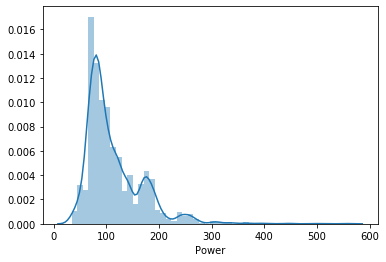

In [70]:
sns.distplot(new_data['Power'])

In [71]:
new_data['Power']=new_data.Power.mask(new_data.Power.isnull() ,median_pow)
print (new_data)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  En

In [72]:
new_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

* all null power are replaced median as its best for right skewed graphs

# For Name

In [73]:
new_data['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5950, dtype: object

* As done above, the name is divided into brand and model

* By observing the above data, we can see that each cell in the column consists of multiple words that provide insights about both the brand and the model of the car. 

* We can thus simplify the dataset by adding columns of "Brand" and "Model" with the help of the "Name" feature/column.

In [74]:
for i,j in new_data.head().iterrows():
    print(j['Name'].split()[0]," ",j['Name'].split()[1]," ","".join(j['Name'].split()[2:]))

Maruti   Wagon   RLXICNG
Hyundai   Creta   1.6CRDiSXOption
Honda   Jazz   V
Maruti   Ertiga   VDI
Audi   A4   New2.0TDIMultitronic


In [75]:
new_data['Brand']=new_data['Name'].apply(lambda x: x.split()[0])

In [76]:
new_data['Model']=new_data['Name'].apply(lambda x: x.split()[1])

In [77]:
new_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon


* From the above, We can observe that the features/columns "Brand" and "Model" is added to the dataframe making the analysis with the feature "Name" easier.

# Outlier Identification and removal below

In [78]:
### Brand Vs. No. of Cars  

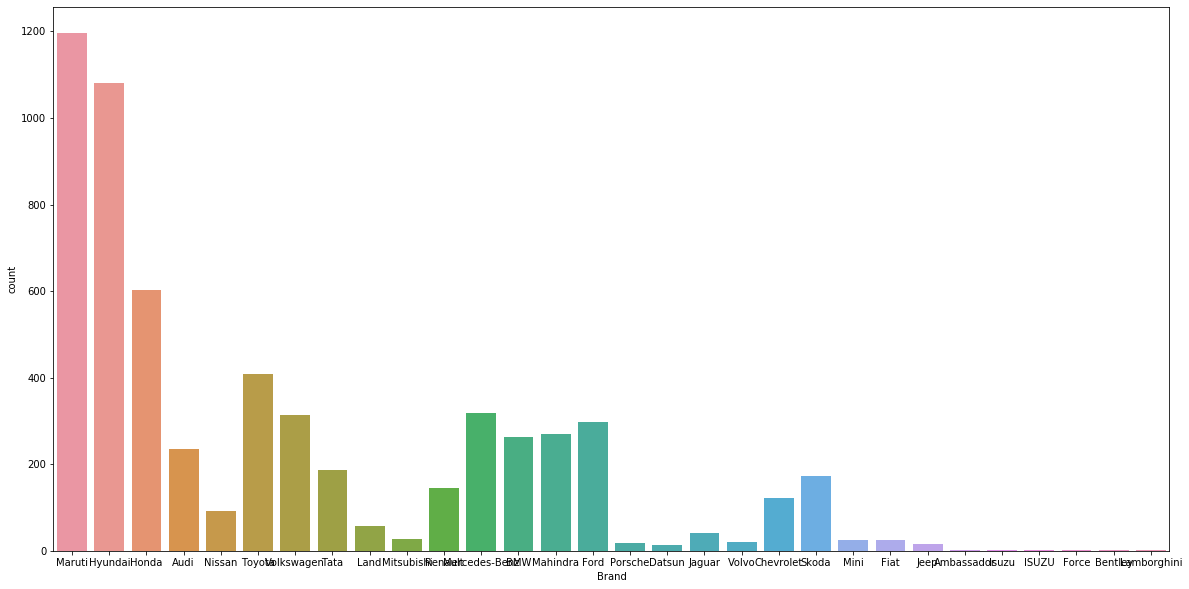

In [79]:
fig = plt.figure(figsize=[20,10])
sns.countplot(new_data['Brand'])

In [80]:
new_data.loc[new_data['Brand'] == 'Isuzu' ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2900,Isuzu MUX 4WD,Jaipur,2017,34429,Diesel,Automatic,First,13.8,2999.0,174.57,7.0,20.0,Isuzu,MUX


In [81]:
len(new_data['Brand'])

5950

In [82]:
new_data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

Observations:

* varied no. and brands
* most :Maruti, Hyundai, Honda
* least: ambassador , bentley, Lamborgini
* 2 isuzu are present ,it should be made to one 

In [83]:
new_data.loc[new_data['Brand'] == 'Isuzu']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2900,Isuzu MUX 4WD,Jaipur,2017,34429,Diesel,Automatic,First,13.8,2999.0,174.57,7.0,20.0,Isuzu,MUX


In [84]:
new_data.loc[new_data['Brand'] == 'ISUZU']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
3624,ISUZU D-MAX V-Cross 4X4,Coimbatore,2018,20422,Diesel,Manual,First,12.4,2499.0,134.0,5.0,16.09,ISUZU,D-MAX
5979,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,25000,Diesel,Manual,First,12.4,2499.0,134.0,5.0,8.00,ISUZU,D-MAX


In [85]:
new_data = new_data.replace('ISUZU','Isuzu')

In [86]:
new_data.loc[new_data['Brand'] == 'ISUZU']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


In [87]:
new_data.loc[new_data['Brand'] == 'Isuzu']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2900,Isuzu MUX 4WD,Jaipur,2017,34429,Diesel,Automatic,First,13.8,2999.0,174.57,7.0,20.00,Isuzu,MUX
3624,ISUZU D-MAX V-Cross 4X4,Coimbatore,2018,20422,Diesel,Manual,First,12.4,2499.0,134.00,5.0,16.09,Isuzu,D-MAX
5979,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,25000,Diesel,Manual,First,12.4,2499.0,134.00,5.0,8.00,Isuzu,D-MAX


In [88]:
new_data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5950.000000,5.950000e+03,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,2013.420000,5.851967e+04,18.350093,1622.899328,113.059398,5.278824,9.536499
std,3.210009,9.165869e+04,4.170971,601.277141,53.566636,0.806182,11.217795
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.379475e+04,15.300000,1198.000000,76.800000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.250000,1493.000000,97.700000,5.000000,5.670000
75%,2016.000000,7.267100e+04,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


* kilometers is huge, maybe large no. as outliner should be removed
* seats has min of 0, possible outliner
* price has min of 0.44 lakhs

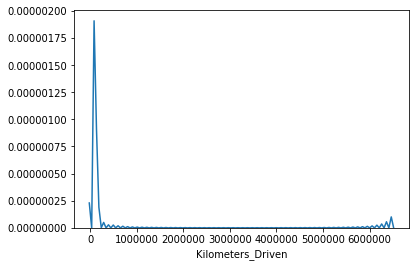

In [89]:
sns.distplot(new_data['Kilometers_Driven'],hist=False)

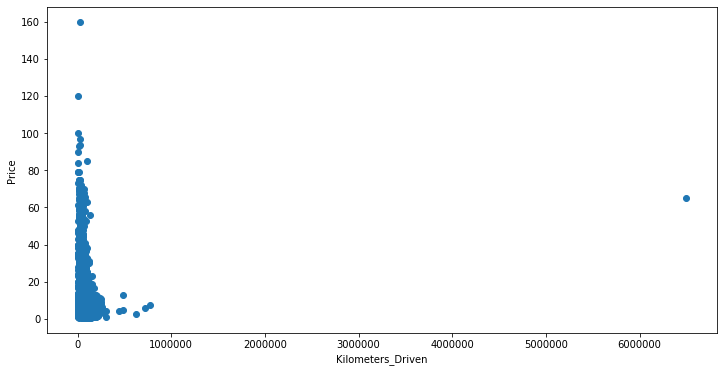

In [90]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Kilometers_Driven'], new_data['Price'])
ax.set_xlabel('Kilometers_Driven')
ax.set_ylabel('Price')
plt.show()

In [91]:
new_data.loc[new_data['Kilometers_Driven']>6000000] 
#delete value

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,BMW,X5


In [92]:
new_data=new_data.drop(index=2328)

In [93]:
new_data.loc[new_data['Kilometers_Driven'] <999]
#delete these too

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7,796.0,47.3,5.0,3.60,Maruti,Alto
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5,1197.0,81.8,5.0,6.25,Maruti,Wagon


In [94]:
indexes =[1361,5606]

for i in indexes:
    new_data=new_data.drop(index=i)

In [95]:
#max value 7,00,000
new_data.loc[new_data['Kilometers_Driven']>700000] 
#delete these

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,7.5,Skoda,Octavia
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,5.9,Volkswagen,Vento


In [96]:
indexes =[340,1860]

for i in indexes:
    new_data=new_data.drop(index=i)

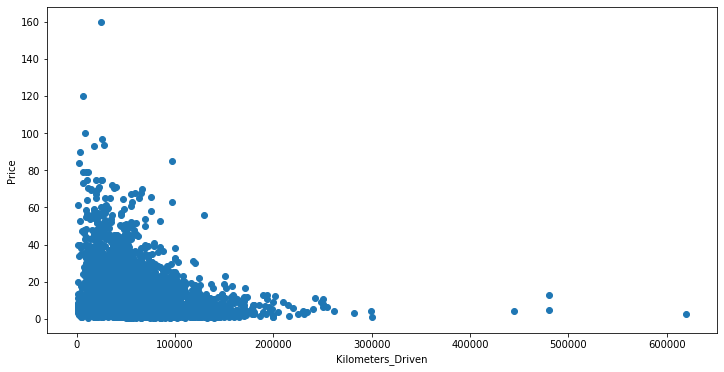

In [97]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Kilometers_Driven'], new_data['Price'])
ax.set_xlabel('Kilometers_Driven')
ax.set_ylabel('Price')
plt.show()

In [98]:
new_data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000
mean,2013.417662,57223.928343,18.348368,1622.825736,113.048229,5.279058,9.529675
std,3.209381,35566.743825,4.171482,601.129613,53.546480,0.806481,11.198952
min,1998.000000,1000.000000,6.400000,72.000000,34.200000,0.000000,0.440000
25%,2012.000000,33800.000000,15.300000,1198.000000,76.800000,5.000000,3.500000
50%,2014.000000,53000.000000,18.250000,1493.000000,97.700000,5.000000,5.660000
75%,2016.000000,72618.000000,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,620000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


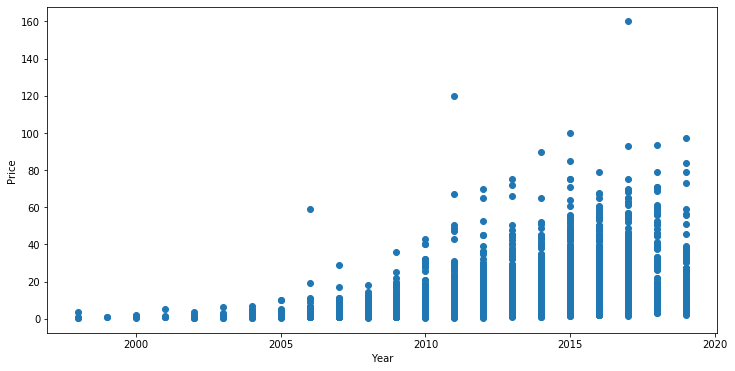

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Year'], new_data['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

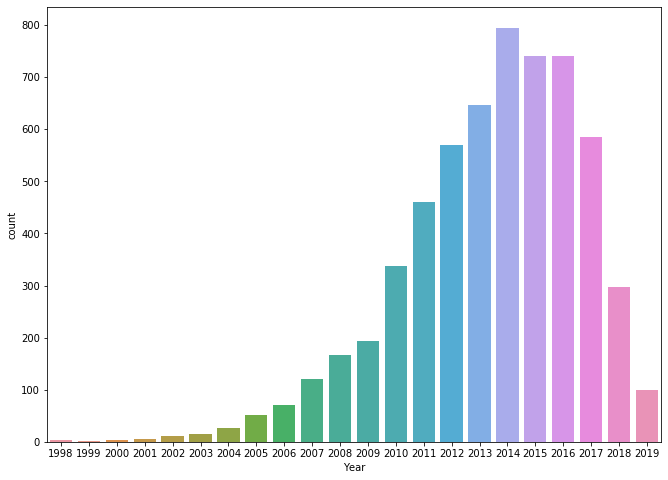

In [100]:
fig = plt.figure(figsize=[11,8])
sns.countplot(new_data['Year'])

In [101]:
new_data.loc[new_data['Year']<=2000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
315,Tata Sumo Delux,Hyderabad,2000,158000,Diesel,Manual,Second,14.07,2956.0,83.1,7.0,1.50,Tata,Sumo
613,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.60,2523.0,63.0,7.0,1.95,Mahindra,Bolero
1224,Maruti Zen VX,Jaipur,1999,70000,Petrol,Manual,Second,17.30,993.0,60.0,5.0,0.77,Maruti,Zen
1845,Honda City 1.3 EXI,Pune,1999,140000,Petrol,Manual,First,13.00,1343.0,90.0,5.0,0.90,Honda,City
3138,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.45,Maruti,Zen
3749,Mercedes-Benz E-Class 250 D W 210,Mumbai,1998,55300,Diesel,Automatic,First,10.00,1796.0,157.7,5.0,3.90,Mercedes-Benz,E-Class
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.00,970.0,97.7,5.0,0.85,Maruti,1000
5137,Maruti Zen VXi - BS III,Jaipur,2000,90000,Petrol,Manual,Second,17.30,993.0,60.0,5.0,0.70,Maruti,Zen
5716,Maruti Zen LX,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.53,Maruti,Zen
5926,Maruti 800 DX BSII,Pune,2000,78000,Petrol,Manual,First,16.10,796.0,37.0,4.0,0.55,Maruti,800


Observation:
* Cars older than 2000 are less in no.

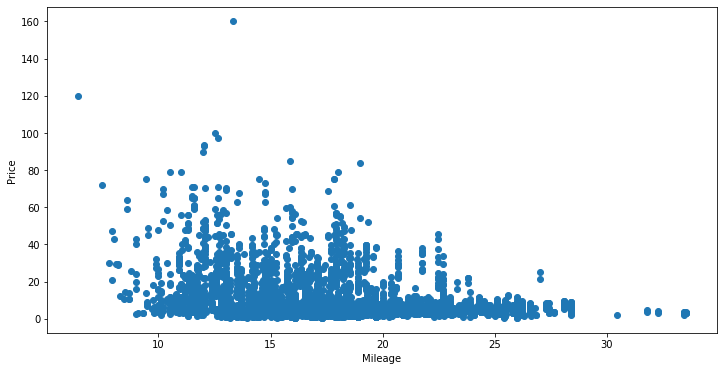

In [102]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Mileage'], new_data['Price'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.show()

In [103]:
new_data.loc[new_data['Mileage'] >29.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,3.50,Maruti,Alto
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,2.96,Maruti,Wagon
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,3.05,Maruti,Wagon
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,3.90,Maruti,Wagon
2701,Maruti Celerio CNG VXI MT,Kochi,2016,70536,CNG,Manual,First,31.79,998.0,58.33,5.0,4.58,Maruti,Celerio
3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26,998.0,58.20,4.0,4.00,Maruti,Alto
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,3.25,Maruti,Wagon
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,3.00,Maruti,Alto
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,2.10,Maruti,Alto
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,2.85,Maruti,Wagon


Observation:

From the above figure and table, the observation is :
* Petrol and Diesel have an general max Mileage of 28kmpl
* But, in the case of CNG, it is between 29 & 33 kmkg

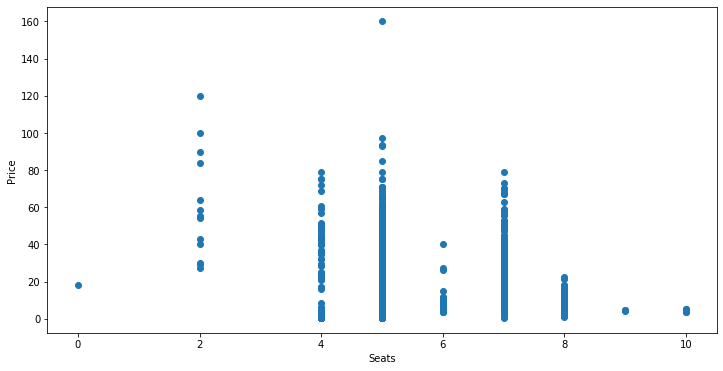

In [104]:
#seats has min 0
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Seats'], new_data['Price'])
ax.set_xlabel('Seats')
ax.set_ylabel('Price')
plt.show()

Observation:
* 1 row value has 0 seats
* the maximum no. of Seats in the dataset is 7

In [105]:
new_data.loc[new_data['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0,Audi,A4


In [106]:
avg = new_data.loc[(new_data['Brand'] == 'Audi')& (new_data['Model'] == 'A4') & (new_data['Name'] != 'Audi A4 3.2 FSI Tiptronic Quattro') ]

In [107]:
avg

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,21.43,Audi,A4
65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55,1968.0,140.00,5.0,13.50,Audi,A4
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,9.80,Audi,A4
150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,23.32,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,Audi A4 3.0 TDI Quattro,Bangalore,2014,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,24.50,Audi,A4
5699,Audi A4 2.0 TDI,Bangalore,2014,37600,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,22.50,Audi,A4
5776,Audi A4 2.0 TDI 177 Bhp Premium Plus,Chennai,2014,40000,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,22.00,Audi,A4
5877,Audi A4 2.0 TDI Celebration Edition,Delhi,2011,57000,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,9.75,Audi,A4


In [108]:
seats_mean=avg['Seats'].mean()
seats_mean

5.0

In [109]:
#replace 0 with mean

In [110]:
new_data['Seats']=new_data.Seats.mask(new_data.Seats == 0 ,seats_mean)
print (new_data.head(3948))

                                   Name    Location  Year  Kilometers_Driven  \
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                 ...         ...   ...                ...   
3998            Mahindra Scorpio 2.6 DX     Chennai  2005             120000   
3999  Audi A4 3.2 FSI Tiptronic Quattro   Hyderabad  2012             125000   
4000               Ford Figo Diesel EXI     Kolkata  2011              37000   
4001       Honda Accord 2.4 Inspire M/T      Mumbai  2012              42000   
4002        Hyundai i20 Sportz 1.4 CRDi   Bangalore  2013              60000   

     Fuel_Type Transmission Owner_Type 

In [111]:
new_data.loc[new_data['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


In [112]:
#0 seat case filled with mean

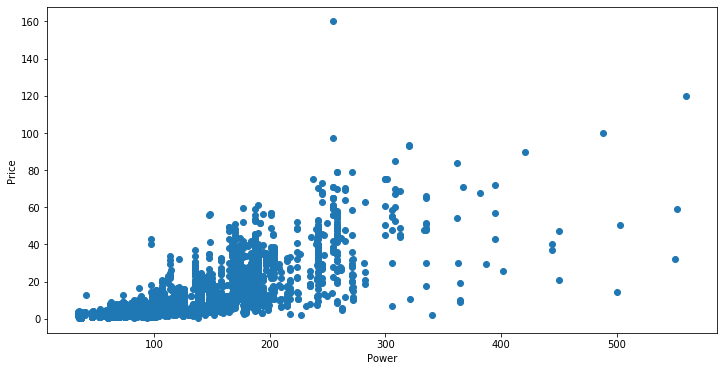

In [113]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Power'], new_data['Price'])
ax.set_xlabel('Power')
ax.set_ylabel('Price')
plt.show()

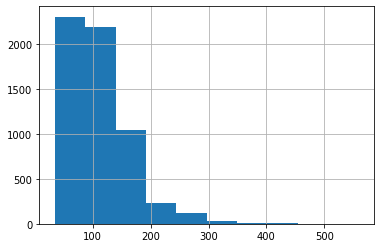

In [114]:
new_data.Power.hist()

Observation:

* right skewed
* only few values after 300bhp power
* max before 100bhp with more than 2000 values

In [115]:
#max power examples
new_data.loc[new_data['Power'] >=500]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.5,4806.0,500.0,5.0,14.50,Porsche,Cayenne
2100,Porsche Cayenne Turbo S,Mumbai,2010,35000,Petrol,Automatic,Second,11.9,4806.0,550.0,5.0,32.00,Porsche,Cayenne
5088,Jaguar XJ 5.0 L V8 Supercharged,Coimbatore,2011,43686,Petrol,Automatic,First,10.5,5000.0,503.0,4.0,50.66,Jaguar,XJ
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6,5998.0,552.0,4.0,59.00,Bentley,Continental
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.00,Lamborghini,Gallardo


In [116]:
#min power example
new_data.loc[new_data['Power'] <40]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
41,Tata Nano LX SE,Kochi,2014,19698,Petrol,Manual,First,25.40,624.0,37.50,4.0,1.53,Tata,Nano
105,Maruti Omni 5 Str STD,Coimbatore,2010,93850,Petrol,Manual,First,14.00,796.0,35.00,5.0,2.41,Maruti,Omni
112,Tata Nano Twist XT,Bangalore,2014,25500,Petrol,Manual,First,25.40,624.0,37.50,4.0,2.15,Tata,Nano
124,Tata Nano XTA,Coimbatore,2017,32684,Petrol,Automatic,First,21.90,624.0,37.48,4.0,3.23,Tata,Nano
257,Maruti Omni MPI CARGO BSIII W/ IMMOBILISER,Jaipur,2011,35000,Petrol,Manual,Third,19.70,796.0,35.00,5.0,1.85,Maruti,Omni
313,Maruti Omni 8 Seater BSIV,Hyderabad,2012,71791,Petrol,Manual,First,14.00,796.0,35.00,5.0,2.05,Maruti,Omni
375,Maruti 800 AC,Chennai,2007,72000,Petrol,Manual,Third,16.10,796.0,37.00,4.0,1.00,Maruti,800
523,Tata Nano Twist XT,Ahmedabad,2014,18000,Petrol,Manual,Second,25.40,624.0,37.50,4.0,1.00,Tata,Nano
602,Maruti Omni 8 Seater BSII,Pune,2010,60000,Petrol,Manual,First,19.70,796.0,35.00,8.0,1.45,Maruti,Omni
740,Tata Nano XTA,Coimbatore,2016,24941,Petrol,Automatic,First,21.90,624.0,37.48,4.0,3.19,Tata,Nano


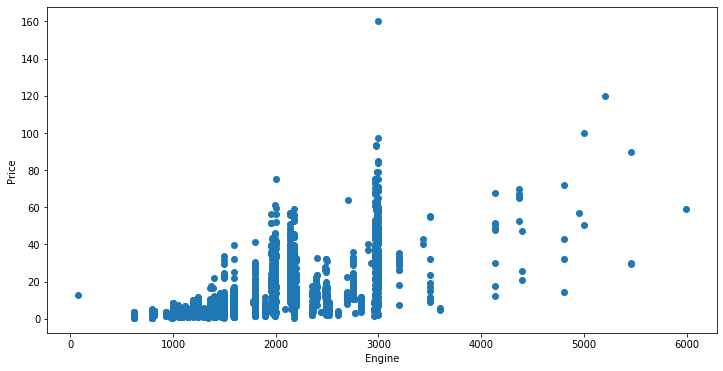

In [117]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(new_data['Engine'], new_data['Price'])
ax.set_xlabel('Engine')
ax.set_ylabel('Price')
plt.show()

outliners are:
* less than 1000cc
* only few engines are present more than 5000cc 

In [118]:
new_data.loc[new_data['Engine'] >5000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.0,Mercedes-Benz,S
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.0,2.0,90.0,Mercedes-Benz,SLK-Class
4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,29.5,Mercedes-Benz,SL-Class
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,59.0,Bentley,Continental
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.0,Lamborghini,Gallardo


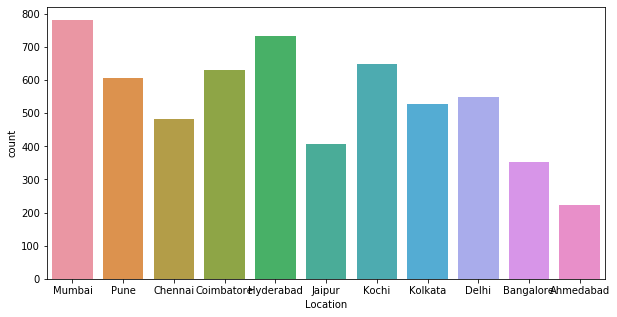

In [119]:
fig = plt.figure(figsize=[10,5])
sns.countplot(new_data['Location'])

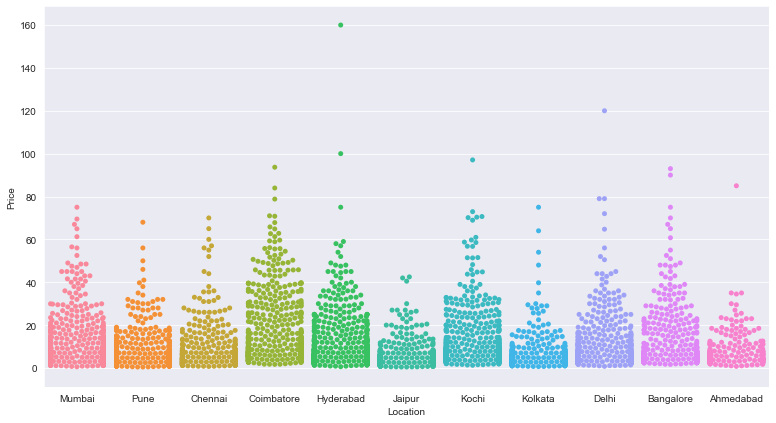

In [120]:
sns.set_style('darkgrid')
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x='Location',y='Price',data=new_data,ax=ax)

Observations:
* Most of the cars are from Mumbai followed by Hyderabad
* After the price of 60(Lakhs),in general, the outliners start to appear in all cities

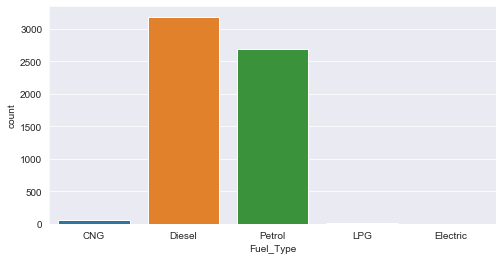

In [121]:
fig = plt.figure(figsize=[8,4])
sns.countplot(new_data['Fuel_Type'])

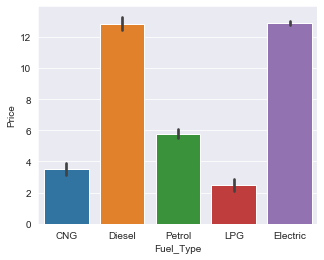

In [122]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Fuel_Type','Price',data=new_data,ax=ax)

In [123]:
new_data.loc[new_data['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,18.350093,72.0,41.0,5.0,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,18.350093,1798.0,73.0,5.0,12.75,Toyota,Prius


In [124]:
new_data.loc[new_data['Fuel_Type'] == 'LPG']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,Hyundai,EON
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.20,998.0,58.20,5.0,2.85,Maruti,Wagon
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.30,1061.0,57.50,5.0,1.45,Maruti,Wagon
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45,1086.0,62.10,5.0,1.65,Hyundai,Santro
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45,1086.0,62.10,5.0,3.10,Hyundai,Santro
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.20,1086.0,68.05,5.0,2.85,Hyundai,i10
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45,1086.0,62.10,5.0,3.20,Hyundai,Santro
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.30,1061.0,57.50,5.0,1.95,Maruti,Wagon
5506,Maruti Wagon R Duo LX BSIII,Hyderabad,2012,72389,LPG,Manual,First,26.20,998.0,58.20,5.0,3.20,Maruti,Wagon
5997,Maruti Wagon R Duo Lxi,Jaipur,2010,70000,LPG,Manual,First,26.20,998.0,58.20,5.0,2.27,Maruti,Wagon


Observations:

* Electric are very less in number, expensive and isnt effective in India due to its lack of functionality &availablity so it can be deleted 
* LPG, even less in number, has good mileage and Engine with affordable price so it can be considered for further analysis

In [125]:
#electric is deleted
indexes=[4446,4904]

for i in indexes:
    new_data=new_data.drop(index=i)

In [126]:
new_data.loc[new_data['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


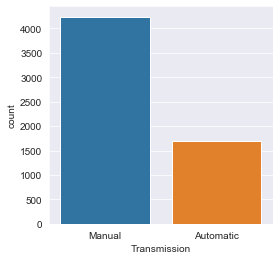

In [127]:
fig = plt.figure(figsize=[4,4])
sns.countplot(new_data['Transmission'])

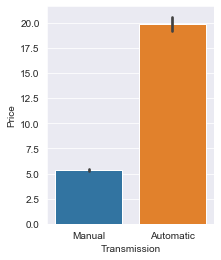

In [128]:
fig_dims = (3, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Transmission','Price',data=new_data,ax=ax)

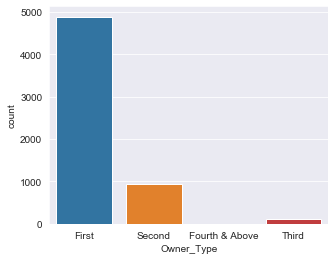

In [129]:
fig = plt.figure(figsize=[5,4])
sns.countplot(new_data['Owner_Type'])

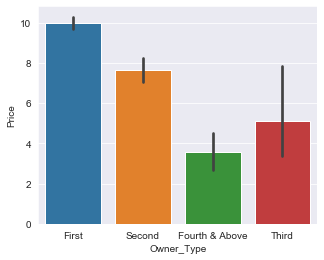

In [130]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Owner_Type','Price',data=new_data,ax=ax)

* less fourth & above Owner_Type but make up significant price

In [131]:
new_data.shape

(5943, 14)

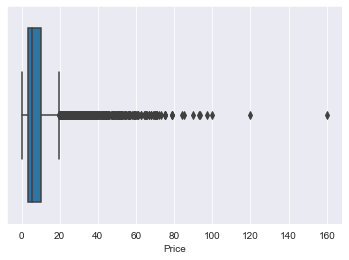

In [132]:
sns.boxplot(x=new_data['Price'])

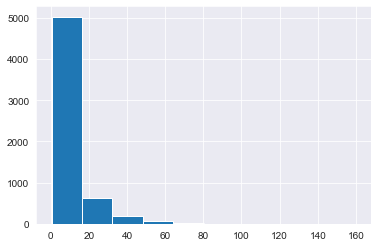

In [133]:
new_data.Price.hist()

In [134]:
new_data.loc[new_data['Price'] >99]
#outliners delete these

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,Land,Rover
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.0,Lamborghini,Gallardo
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,100.0,Jaguar,F


In [135]:
indexes= [4079,5781,5919]

for i in indexes:
    new_data=new_data.drop(index=i)

In [136]:
new_data.loc[new_data['Price'] >99]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


* max price 99 lakhs
* min is:

In [137]:
new_data.loc[new_data['Price'] <0.5]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
1628,Maruti 800 Std BSIII,Jaipur,2004,12000,Petrol,Manual,Second,16.1,796.0,37.0,4.0,0.45,Maruti,800
1713,Tata Nano Lx,Pune,2011,65000,Petrol,Manual,Second,26.0,624.0,35.0,4.0,0.44,Tata,Nano
2847,Hyundai Getz GLS,Pune,2005,86000,Petrol,Manual,Second,15.3,1341.0,83.0,5.0,0.45,Hyundai,Getz
3138,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.3,993.0,60.0,5.0,0.45,Maruti,Zen


* min is 0.44lakhs

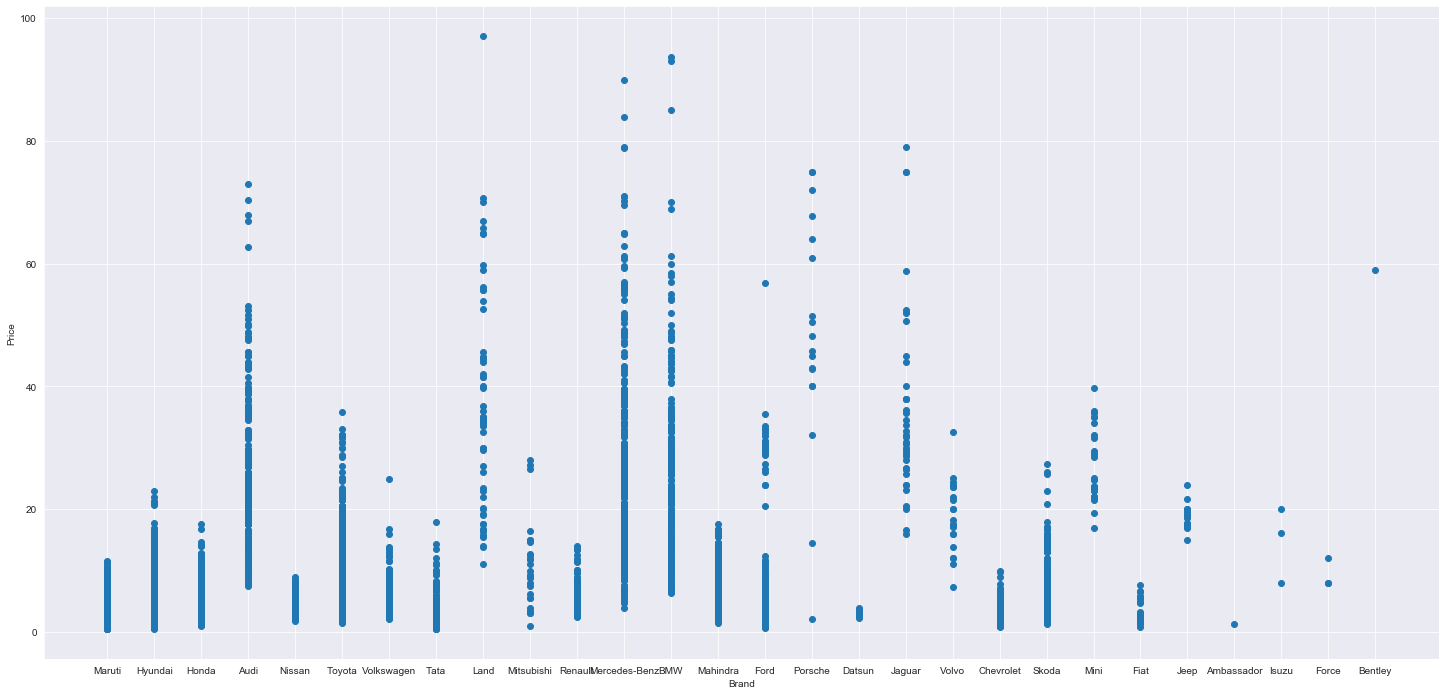

In [138]:
fig, ax = plt.subplots(figsize=(25,12))
ax.scatter(new_data['Brand'], new_data['Price'])
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
plt.show()

* most expensive brand is Land followed by BMW

In [139]:
new_data.shape

(5940, 14)

# EDA (relation between variables)

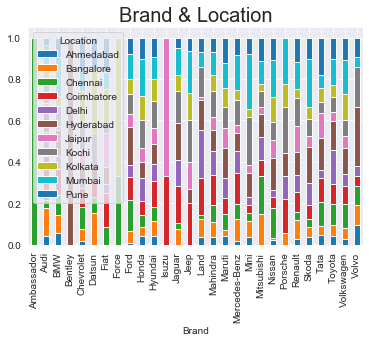

In [140]:
gr=pd.crosstab(new_data['Brand'],new_data['Location'],normalize=0) #normalized values 
gr.plot.bar(stacked=True)
plt.title('Brand & Location',fontsize=20)
plt.show()

Observation:
* there are varied brands in different locations

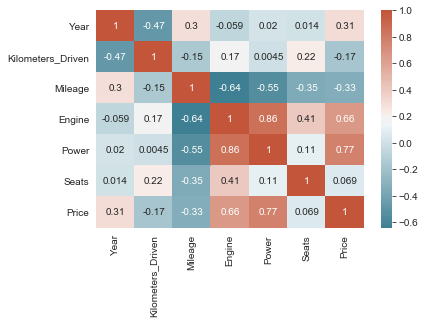

In [141]:
# calculate correlation matrix
corr = new_data.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Observations:

* The max positive correlation is between Power and Engine which inturn have positve correlation with price impling that the more power and more engine is more the price
* The power and Engine also have a negative correlation with mileage which inturn has a negative correlation with price. This gives more power, more Engine, less Mileage is more expensive
* Kilometers_Driven and Year has negative correction indicating the older the car the lesser it has travelled
* The engine and no. of seats have a positive correction indicating that there might be a relation to the load and the working of the engine
* The year and price are in positive correlation stating that the newer the car, more the price. the newer the car is, the more expensive it’s likely to be.

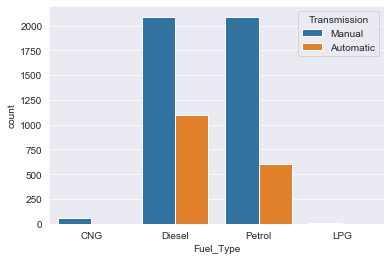

In [142]:
sns.countplot('Fuel_Type',data=new_data,hue='Transmission')

Observations:
* Most cars whose fuel type is Dieseal and Petrol are Manual
* Most of the CNG cars are Manual

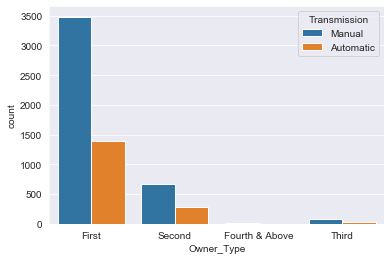

In [143]:
sns.countplot('Owner_Type',data=new_data,hue='Transmission')

Observations:

* The Manual Transmission cars dominate across all Owner Types

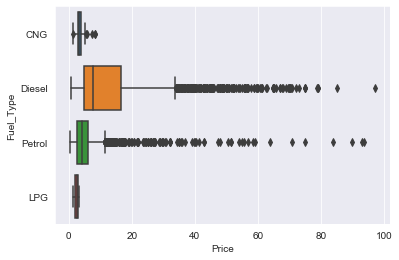

In [144]:
sns.boxplot(y = 'Fuel_Type', x = 'Price', data = new_data)

Observation:
* Diesel Fuel Type cars are the most Expensive

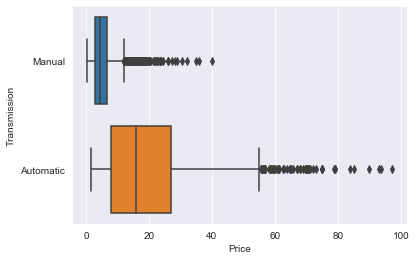

In [145]:
sns.boxplot(y = 'Transmission', x = 'Price', data = new_data)

Observation:
* Automatic Transmission cars are more costier than Manual

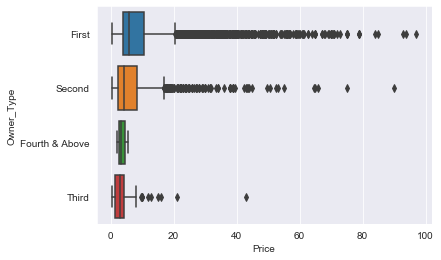

In [146]:
sns.boxplot(y = 'Owner_Type', x = 'Price', data = new_data)

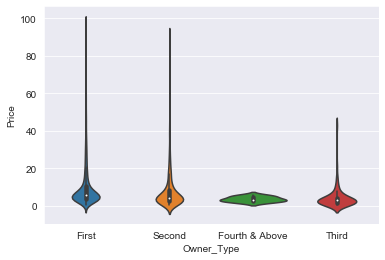

In [147]:
sns.violinplot(x="Owner_Type",y="Price",data=new_data,size=10)
plt.show()

Observation:
* First Owner Type cars are more Expensive as they might be less used    

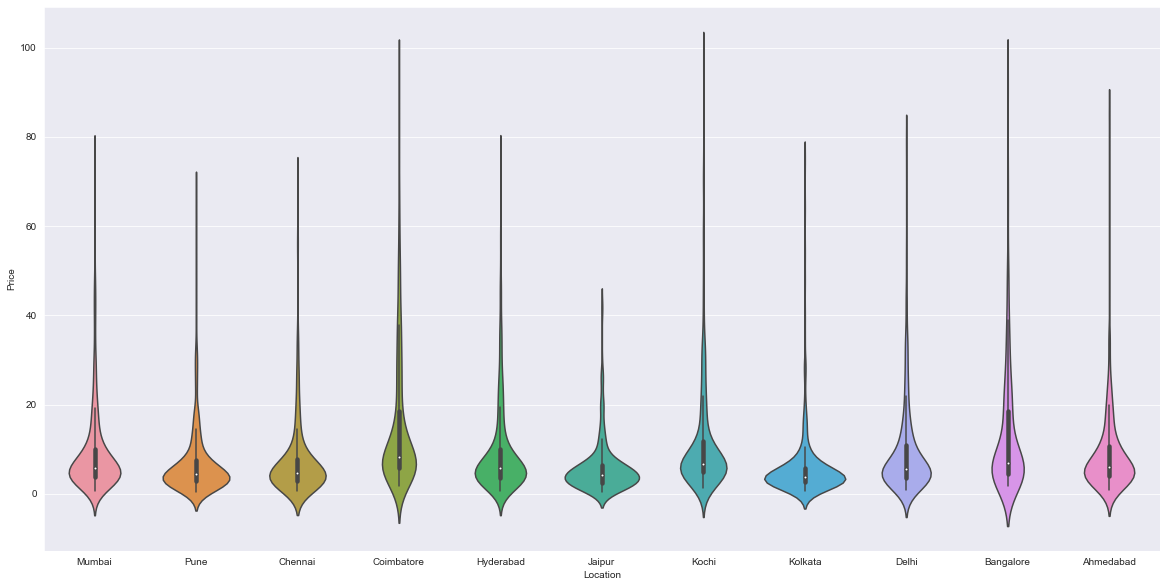

In [148]:
fig = plt.figure(figsize=[20,10])
sns.violinplot(x="Location",y="Price",data=new_data,size=10)
plt.show()

Observation:
* Prices of cars vary according to Location
* The most expensive car is from Kochi

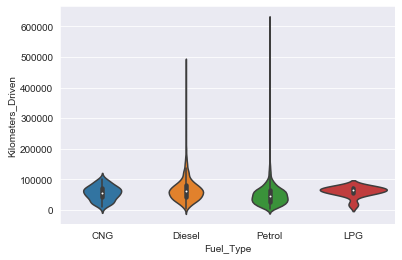

In [149]:
sns.violinplot(x="Fuel_Type",y="Kilometers_Driven",data=new_data,size=10)
plt.show()

Observation:
* Petrol cars have travelled the most kilometers

In [150]:
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


# Handle Categorical Variable

* One-Hot Encoding only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded.

* So, Label Enconding Categorical Variables before One-Hot encoding it

### <font color = "brown">Label encoding<font>

In [151]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
new_data['Brand_Cat'] = labelencoder.fit_transform(new_data['Brand'])
new_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Brand_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,16
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift,16
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent,10
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo,15
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon,16


In [152]:
new_data['Location_Cat'] = labelencoder.fit_transform(new_data['Location'])
new_data['Fuel_Type_Cat'] = labelencoder.fit_transform(new_data['Fuel_Type'])
#new_data['Model_Cat'] = labelencoder.fit_transform(new_data['Model'])
new_data['Name_Cat'] = labelencoder.fit_transform(new_data['Name'])

In [153]:
new_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Brand_Cat,Location_Cat,Fuel_Type_Cat,Name_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,16,9,0,1164
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,10,10,1,503
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,9,2,3,477
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,16,2,1,1028
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,1,3,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift,16,4,1,1123
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent,10,6,1,646
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo,15,6,1,902
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon,16,8,3,1171


In [154]:
#1. Variable which are label encoded (original variablles are dropped)
#2. Through Data Exploration(EDA and analysis) and Trial & error, It is that the columns 'Model','Transmission','Owner_Type'&'Seats'
#have not been effective in improving the model and are considereed unimportant and are being dropped
new_data_cat = new_data.drop(columns = ['Name','Model','Seats','Fuel_Type','Transmission','Owner_Type','Brand','Location'])

In [155]:
new_data_cat

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Brand_Cat,Location_Cat,Fuel_Type_Cat,Name_Cat
0,2010,72000,26.60,998.0,58.16,1.75,16,9,0,1164
1,2015,41000,19.67,1582.0,126.20,12.50,10,10,1,503
2,2011,46000,18.20,1199.0,88.70,4.50,9,2,3,477
3,2012,87000,20.77,1248.0,88.76,6.00,16,2,1,1028
4,2013,40670,15.20,1968.0,140.80,17.74,1,3,1,23
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,4.75,16,4,1,1123
6015,2015,100000,24.40,1120.0,71.00,4.00,10,6,1,646
6016,2012,55000,14.00,2498.0,112.00,2.90,15,6,1,902
6017,2013,46000,18.90,998.0,67.10,2.65,16,8,3,1171


### <font color = "brown">One-Hot Encoding<font>

In [156]:
# generate binary values using get_dummies
#passing categorially label encoded variables to be one-hot encoded
dum_df = pd.get_dummies(new_data_cat, columns=['Fuel_Type_Cat','Location_Cat','Name_Cat','Brand_Cat'])

dum_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Fuel_Type_Cat_0,Fuel_Type_Cat_1,Fuel_Type_Cat_2,Fuel_Type_Cat_3,...,Brand_Cat_18,Brand_Cat_19,Brand_Cat_20,Brand_Cat_21,Brand_Cat_22,Brand_Cat_23,Brand_Cat_24,Brand_Cat_25,Brand_Cat_26,Brand_Cat_27
0,2010,72000,26.60,998.0,58.16,1.75,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,12.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,4.50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,6.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,17.74,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,4.75,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,4.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,2.90,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,2.65,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [157]:
new_data_cat = pd.concat([new_data_cat,dum_df],axis='columns')
new_data_cat

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Brand_Cat,Location_Cat,Fuel_Type_Cat,Name_Cat,...,Brand_Cat_18,Brand_Cat_19,Brand_Cat_20,Brand_Cat_21,Brand_Cat_22,Brand_Cat_23,Brand_Cat_24,Brand_Cat_25,Brand_Cat_26,Brand_Cat_27
0,2010,72000,26.60,998.0,58.16,1.75,16,9,0,1164,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,12.50,10,10,1,503,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,4.50,9,2,3,477,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,6.00,16,2,1,1028,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,17.74,1,3,1,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,4.75,16,4,1,1123,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,4.00,10,6,1,646,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,2.90,15,6,1,902,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,2.65,16,8,3,1171,...,0,0,0,0,0,0,0,0,0,0


In [158]:
#to remove duplicate/repeated columns
new_data_cat = new_data_cat.loc[:,~new_data_cat.columns.duplicated()]

In [159]:
new_data_cat

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Brand_Cat,Location_Cat,Fuel_Type_Cat,Name_Cat,...,Brand_Cat_18,Brand_Cat_19,Brand_Cat_20,Brand_Cat_21,Brand_Cat_22,Brand_Cat_23,Brand_Cat_24,Brand_Cat_25,Brand_Cat_26,Brand_Cat_27
0,2010,72000,26.60,998.0,58.16,1.75,16,9,0,1164,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,12.50,10,10,1,503,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,4.50,9,2,3,477,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,6.00,16,2,1,1028,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,17.74,1,3,1,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,4.75,16,4,1,1123,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,4.00,10,6,1,646,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,2.90,15,6,1,902,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,2.65,16,8,3,1171,...,0,0,0,0,0,0,0,0,0,0


In [160]:
xc=new_data_cat.drop(columns='Price')
xc

,Year,Kilometers_Driven,Mileage,Engine,Power,Brand_Cat,Location_Cat,Fuel_Type_Cat,Name_Cat,Fuel_Type_Cat_0,...,Brand_Cat_18,Brand_Cat_19,Brand_Cat_20,Brand_Cat_21,Brand_Cat_22,Brand_Cat_23,Brand_Cat_24,Brand_Cat_25,Brand_Cat_26,Brand_Cat_27
0,2010,72000,26.60,998.0,58.16,16,9,0,1164,1,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,10,10,1,503,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,9,2,3,477,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,16,2,1,1028,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,1,3,1,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,16,4,1,1123,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,10,6,1,646,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,15,6,1,902,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,16,8,3,1171,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
yc=new_data_cat.Price
yc

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5940, dtype: float64

# Data Scaling of Kilometers_Driven

In [162]:
from sklearn.preprocessing import StandardScaler 
 
#Initialise the Scaler 
scaler = StandardScaler() 


In [163]:
# To scale data 
Kilometers_scaled = scaler.fit_transform(new_data[['Kilometers_Driven']]) 
Kilometers_scaled

array([[ 0.41475715],
       [-0.4569135 ],
       [-0.31632146],
       ...,
       [-0.06325579],
       [-0.31632146],
       [-0.28820305]])

In [165]:
new_data_cat['Kilometers_Driven'] = Kilometers_scaled

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
new_data_cat.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Brand_Cat,Location_Cat,Fuel_Type_Cat,Name_Cat,...,Brand_Cat_18,Brand_Cat_19,Brand_Cat_20,Brand_Cat_21,Brand_Cat_22,Brand_Cat_23,Brand_Cat_24,Brand_Cat_25,Brand_Cat_26,Brand_Cat_27
0,2010,0.414757,26.60,998.0,58.16,1.75,16,9,0,1164,...,0,0,0,0,0,0,0,0,0,0
1,2015,-0.456913,19.67,1582.0,126.20,12.50,10,10,1,503,...,0,0,0,0,0,0,0,0,0,0
2,2011,-0.316321,18.20,1199.0,88.70,4.50,9,2,3,477,...,0,0,0,0,0,0,0,0,0,0
3,2012,0.836533,20.77,1248.0,88.76,6.00,16,2,1,1028,...,0,0,0,0,0,0,0,0,0,0
4,2013,-0.466193,15.20,1968.0,140.80,17.74,1,3,1,23,...,0,0,0,0,0,0,0,0,0,0


# Train Test  split

In [167]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size = 0.2,random_state=42)

Train and Test data are now divided into 80-20% with 80% in train data and 20% in test data

# ML regression Algorithms

## Linear Regression

In [168]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xc_train,yc_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
yc_pred = model.predict(xc_test)

In [170]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# The coefficients
#print('Coefficients: \n', model.coef_)
mse=mean_squared_error(yc_test,yc_pred)
rmse=sqrt(mse)

print('RMSE:',rmse)
print('R2 :',r2_score(yc_test,yc_pred))

RMSE: 4.978521641685388
R2 : 0.8080586748648436


## KNN Regression

In [171]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

In [172]:
error=[]
for k in range(1,13):
    knn=KNeighborsRegressor(n_neighbors=1)
    knn.fit(xc_train,yc_train)
    pred=knn.predict(xc_test)
    mse=mean_squared_error(yc_test,pred)
    rmse=math.sqrt(mse)
    error.append(rmse)
    print('for neighbors=',k,'rmse:',rmse)

for neighbors= 1 rmse: 8.586381610332094
for neighbors= 2 rmse: 8.586381610332094
for neighbors= 3 rmse: 8.586381610332094
for neighbors= 4 rmse: 8.586381610332094
for neighbors= 5 rmse: 8.586381610332094
for neighbors= 6 rmse: 8.586381610332094
for neighbors= 7 rmse: 8.586381610332094
for neighbors= 8 rmse: 8.586381610332094
for neighbors= 9 rmse: 8.586381610332094
for neighbors= 10 rmse: 8.586381610332094
for neighbors= 11 rmse: 8.586381610332094
for neighbors= 12 rmse: 8.586381610332094


In [173]:
#print('R2 :',r2_score(yc_test,pred))#0.429

* So, the root mean squared error is not varying for the no of neighbors in KNN algorithm

Text(0, 0.5, 'RMSE')

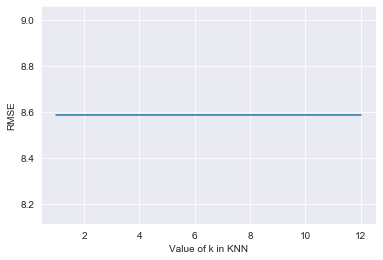

In [174]:
x=range(1,13)
plt.plot(x,error)
plt.xlabel('Value of k in KNN')
plt.ylabel('RMSE')

Text(0, 0.5, 'Predicted values of price')

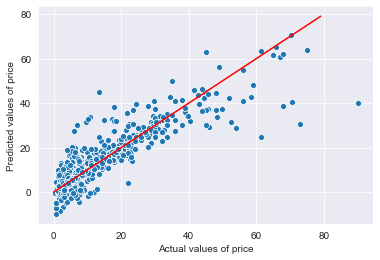

In [175]:
sns.scatterplot(yc_test,yc_pred)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## Random Forest Regression

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [178]:
def custom_excepthook(type, value, traceback):
    if type is KeyboardInterrupt:
        return # do nothing
    else:
        sys.__excepthook__(type, value, traceback)
rf.fit(xc_train, yc_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [179]:
import statsmodels.api as sm
predrf=rf.predict(xc_test)
reg_ols=sm.OLS(endog=yc_train,exog=xc_train).fit()


* Finding the root mean squared error

In [180]:
mse=mean_squared_error(yc_test,predrf)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 3.261900012107109


In [181]:
#print('R2 :',r2_score(yc_test,predrf)) #91.76

* Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

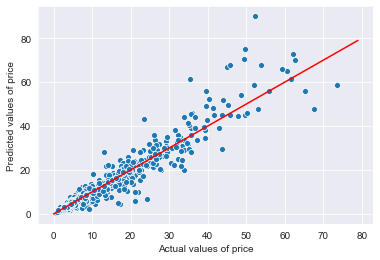

In [182]:
sns.scatterplot(predrf,yc_test)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## Multiple Regression

In [183]:
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_log_error,r2_score
reg= LinearRegression()
reg.fit(xc_train,yc_train)   
predlin=reg.predict(xc_test)
reg_ols=sm.OLS(endog=yc_train,exog=xc_train).fit()

* Finding the root mean squared error

In [184]:
mse=mean_squared_error(yc_test,predlin)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 4.978521641685388


In [185]:
#print('R2 :',r2_score(yc_test,predlin)) #0.8081

* Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

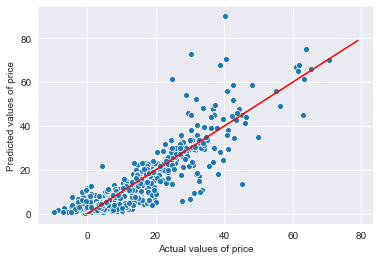

In [186]:
sns.scatterplot(predlin,yc_test)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## Decision Tree Regressor

In [187]:
import sklearn.tree as model
dt=model.DecisionTreeRegressor(criterion='mse')
dt.fit(xc_train,yc_train)
preddec=dt.predict(xc_test)
reg_ols=sm.OLS(endog=yc_train,exog=xc_train).fit()

* Finding the root mean squared error

In [188]:
mse=mean_squared_error(yc_test,preddec)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 4.452099580828064


In [189]:
#print('R2 :',r2_score(yc_test,preddec))#0.8431

* Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

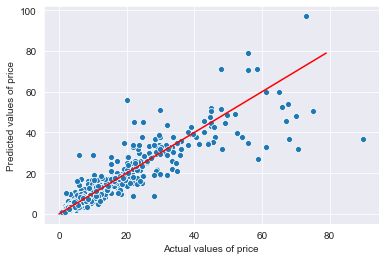

In [190]:
sns.scatterplot(x=yc_test,y=preddec)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## LightGBM Regressor

In [191]:
!pip install lightgbm
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_log_error,r2_score
train_data = lgb.Dataset(xc_train, label=yc_train)
test_data = lgb.Dataset(xc_test, label=yc_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(xc_test)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(yc_test), np.expm1(y_pred_lgbm))))
print('R2 :',r2_score(yc_test,y_pred_lgbm))

D:\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3.06834
[200]	valid_0's rmse: 2.82613
[300]	valid_0's rmse: 2.78332
[400]	valid_0's rmse: 2.75782
[500]	valid_0's rmse: 2.74788
Early stopping, best iteration is:
[453]	valid_0's rmse: 2.74608
RMSLE: 2.7460812742999328
R2 : 0.94160247201959


About above arguments:

* objective - Specify learning task and corr learning objective.
* gbdt - Gradient Boosting Decision Tree.
* num_leaves - maximum tree leaves.
* max_depth - maximum tree depth.
* min_data_in_leaf - minimal number of data in one leaf.
* bagging_fraction - selects small part of data without resampling, speed up boosting and is used to deal with overfitting.
* feature_fraction - will select 80% of features before training each tree,speed up training.

* params - parameters for booster.
* early_stopping_rounds - initiates early stopping.

* predict(data) - To make a prediction, here data is data source for prediction here test data.
* RMSLE - root mean squared log error.
* R2 score - R squared score.


In [192]:
mse=mean_squared_error(yc_test,y_pred_lgbm)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 2.7460812742999328


* Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

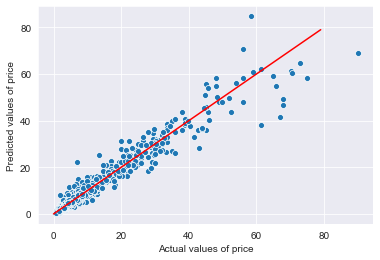

In [193]:
sns.scatterplot(x=yc_test,y=y_pred_lgbm)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

###  SELECTING THE BEST MODEL

* From all the above models, we can see that the Root mean squared error is minimum for LightGBM Regression.
* So, we will predict on the Test Data by using LightGBM Regressor.

## MAKING PREDICTIONS ON THE UNKNOWN(TEST) DATA

In [194]:
Predicted_price=lgbm.predict(xc_test)# Using LGBM Regressor, making predictions on the Unknown(Test) data.

In [195]:
Predicted_price=pd.DataFrame(Predicted_price,columns=['Predicted Price(in Lakhs)'])# Storing the predicted values in series

### Saving the predicted price in excelsheet

In [196]:
from pandas import ExcelWriter
with ExcelWriter('Predicted Prices on Unknown(Test) data.xlsx')as writer:# The file saved has name 'Predicted Prices on Unknown(Test) Data'
    Predicted_price.to_excel(writer)# Saving file in excelsheet
writer.save()

In [197]:
Predicted_price

,Predicted Price(in Lakhs)
0,4.318331
1,2.844554
2,4.615694
3,22.393275
4,27.210526
...,...
1183,54.167261
1184,14.712854
1185,18.821210
1186,4.883136


We took into consideration 6 models namely,
- Linear Regression
- KNN
- Random Forest 
- Multiple Regression
- Decision Tree
- LightGBM

 We inferred from the above six models that, LightGBM has given us the least RMSE value.So we used this model for the prediction of dataset.

## <font color = "brown"><center>Feature Importance</center><font>

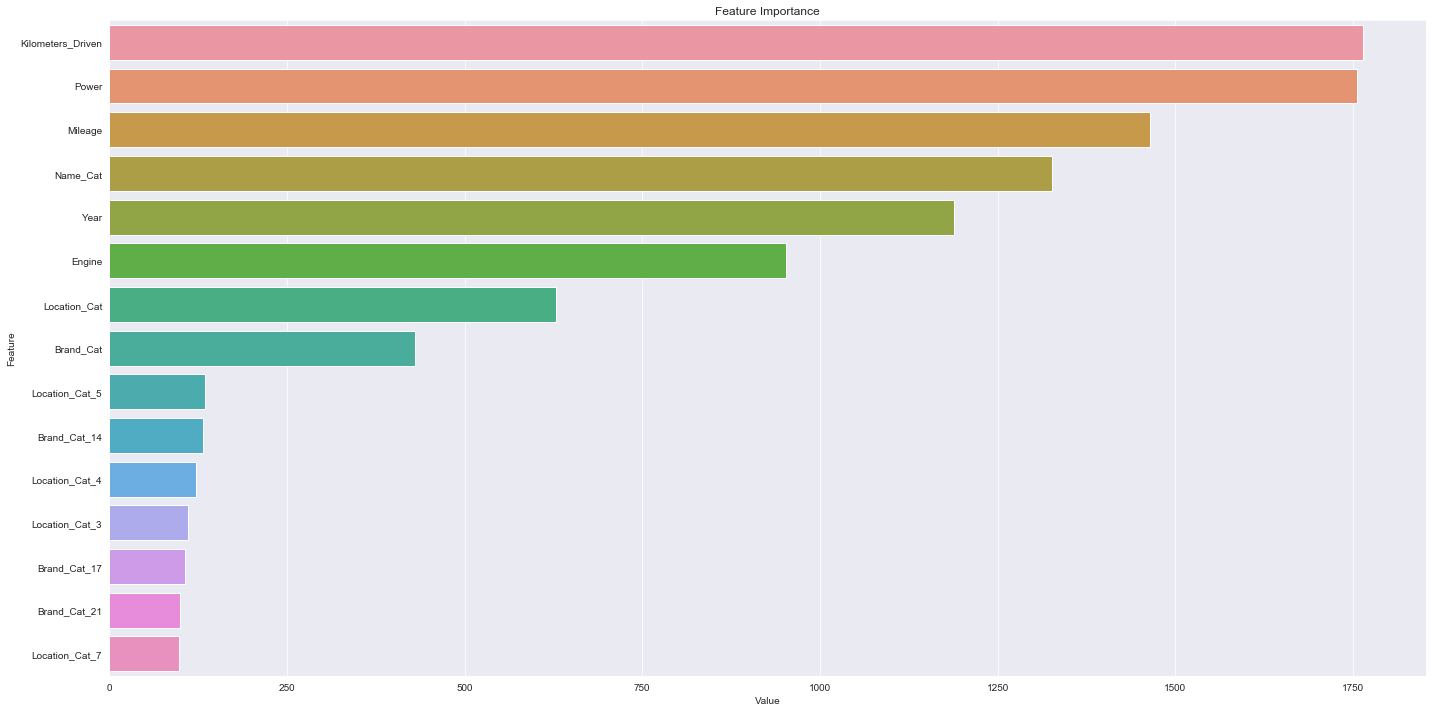

In [198]:
feature_imp=pd.DataFrame(sorted(zip(lgbm.feature_importance(),xc.columns),reverse=True)[:15],
                         columns=['Value','Feature'])
plt.figure(figsize=(20,10))
sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

*Thank you!*